# 单变量的线性回归


**案例**: 假设你是一家公司的ceo，考虑开一家餐厅，根据该城市的人口数据预测利润。

使用数据集：ex1data1.txt  

### code

#### 1. 需要使用的库  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. 读入数据

In [2]:
data = pd.read_csv("./ex1data1.txt", sep=",", names=["population", "profit"])        # 读入数据

read_csv():  
filepath_or_buffer: 读入文件的路径  
sep:           分割符  
names:          列名  

In [3]:
# 查看文件是否正确读入
data.head()
# data.tail(), 如果同时输出两个会产生覆盖

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


**注意**： 在Jupyter Notebook中，在同一个代码块中运行多个输出语句时，只会显示最后一个输出结果。

In [4]:
data.tail()

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [5]:
# dataframe的其它一些操作
data.values # 读取值（去掉行与列的标签名字）
data.describe() # 得到整个表的一些信息

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


#### 3. 绘制数据集的图像

<Axes: xlabel='population', ylabel='profit'>

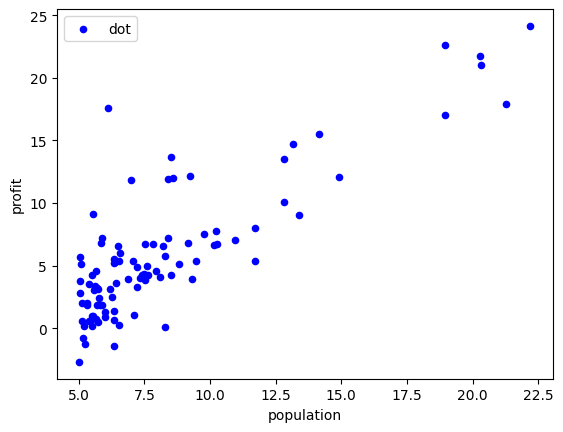

In [6]:
# dataframe可以直接绘图
data.plot.scatter('population', 'profit', label='dot', c='b')

dataframe可以直接绘图  
scatter: 散点图  
x:     定义横轴标签  
y:     定义竖轴标签  
label:  指定点的标签是什么  
c:    用来指定颜色  

#### 4. 构造数据集

需要构造的数据矩阵（使用向量化）  
$$ X=\begin{bmatrix}
         1&x^{(1)}\\
         1& x^{(2)}\\
        \vdots&\vdots\\
         1&x^{(m)}\\
     \end{bmatrix}
$$  
  
  
$$
    \theta=\begin{bmatrix}
            b & w
         \end{bmatrix}
$$
  
  
$$
    Y=\begin{bmatrix}
        y^{(1)}\\
        y^{(2)}\\
        \vdots\\
        y^{(m)}
     \end{bmatrix}
$$

In [7]:
# 对X 加入数据1列, 首先需要对dataframe进行切片
data.insert(loc=0, column='addition', value=1)
data.head()

,addition,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


**注意:** 在jupyter notebook 中插入运行一次，插入一次，反复运行是由于插入列名字已经存在，因而不能插入导致报错

In [8]:
# 进行切片
X = data.iloc[:, 0:2]
Y = data.iloc[:, -1]
X.head()
# Y.head()

,addition,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
X = X.values
Y = Y.values

In [10]:
X.shape

(97, 2)

In [11]:
Y.shape

(97,)

输出为(97,)代表为一维数组，而(97,1)代表2维数组，代表97行，1列

In [12]:
Y = Y.reshape(97, 1)
Y.shape

(97, 1)

#### 4. 函数J的求解

公式：
$$
J = \frac{1}{2m}\times \Sigma((X@\theta-Y)^2)
$$  
**说明:** 平方是对矩阵每个元素平方，不是矩阵乘以自身，求和是对矩阵每个元素进行求和

In [13]:
# 构造J函数的测试代码
matrix1 = np.random.randint(0, 10, size=(3, 1))
print(matrix1)
matrix1 = np.power(matrix1, 2) # 对矩阵每个元素进行平方
print(matrix1)

[[1]
 [0]
 [9]]
[[ 1]
 [ 0]
 [81]]


In [14]:
def cost_J_Function(X, Y, theta):
    matrix = X @ theta - Y
    matrix = np.power(matrix, 2)
    return np.sum(matrix) / (2 * len(X))

In [15]:
# 假定theta(需要确认的参数)
theta = np.zeros((2, 1))
cost_init = cost_J_Function(X, Y, theta)
cost_init

32.072733877455676

$$
    \theta = \theta - \frac{\alpha}{m} \times X^T@(X@\theta - Y)
$$
$\theta$ 在该题中为   
$$
\theta = \begin{bmatrix}
        b\\
        w
       \end{bmatrix}
$$

In [16]:
def gradient_function(X, Y, theta, alpha):
    theta = theta - alpha / len(X) * (X.T @ (X @ theta - Y))
    return theta    

In [17]:
# 先更新theta还是先更新J,都是一样的，如果先更新J，theta[0]={[0],[0]}
def gradient_descent(X, Y, theta, alpha, iters, cost_J_Function, gradient_function):
    history_cost_J = []
    history_theta = []
    for i in range(iters):
        J = cost_J_Function(X, Y, theta)
        history_cost_J.append(J)
        history_theta.append(theta)
        theta = gradient_function(X, Y, theta, alpha)
        if i % 100 == 0:
            print(J)
    return theta, history_cost_J, history_theta

In [18]:
# 对alpha赋值（学习率）
alpha = 0.02
iters = 2000 # 迭代次数
theta, history_cost_J, history_theta = gradient_descent(X, Y, theta, alpha, iters, cost_J_Function, gradient_function)
# history_cost_J
# history_theta

32.072733877455676
5.175697090896738
4.816282367945059
4.641745545313584
4.556988020067781
4.515828578882344
4.495840977854773
4.486134718893739
4.4814212236179065
4.479132284305193
4.478020743321126
4.477480963453484
4.4772188387907965
4.477091547383859
4.477029732894088
4.4769997149122185
4.476985137759857
4.476978058890536
4.476974621292461
4.476972951946698


In [19]:
# 测试np.dot()函数
aa = np.array([1, 2, 3])
bb = np.array([2, 3, 4])
cc = np.dot(aa, bb)
cc
aaa = np.array([[1], [2], [3]])
bbb = np.array([[1, 2, 3]])

**注意:** dot()  
如果传入的是两个一维数组，那么计算的是点积  
如果传入的是二维数组，那么计算的是矩阵乘积  


#### 5. 得到的函数可视化

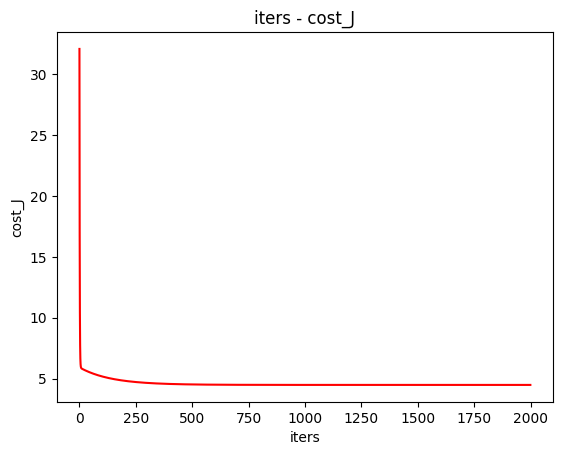

In [20]:
# 使用matplotlib对得到的结果进行绘图表示
fig,ax = plt.subplots()
ax.plot(np.arange(0, iters), history_cost_J, color='red')             # 前两个参数为x与y轴，需要保证数据个数相同
ax.set(xlabel='iters', ylabel='cost_J', title='iters - cost_J')      # 设置一些参数
plt.show()

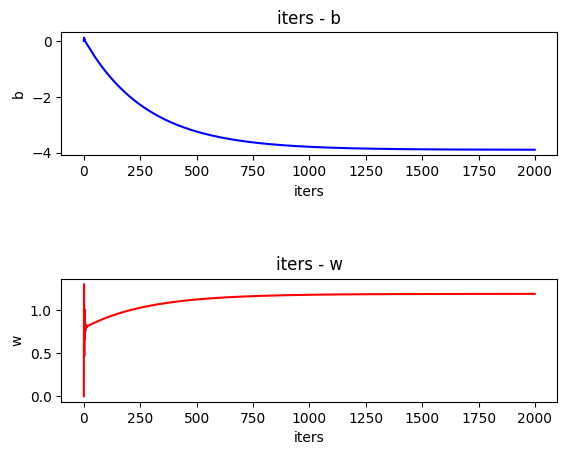

In [59]:
#arguB = history_theta[:, 0]
history_theta = np.array(history_theta)
arguB = history_theta[:,0]
arguB.reshape(2000)
arguW = history_theta[:,-1]
arguW.reshape(2000)
# 开始绘图
fig, ax = plt.subplots(2, 1)
fig.subplots_adjust(hspace=1)
ax[0].plot(np.arange(0, iters), arguB, color='b')
ax[0].set(xlabel='iters', ylabel='b', title='iters - b')
ax[1].plot(np.arange(0, iters), arguW, color='r')
ax[1].set(xlabel='iters', ylabel='w', title='iters - w')
plt.show()

**注意:** 对python中的list无法使用如同[:,:]的切片操作， 如果需要对其切片，需要转换为ndarray数组

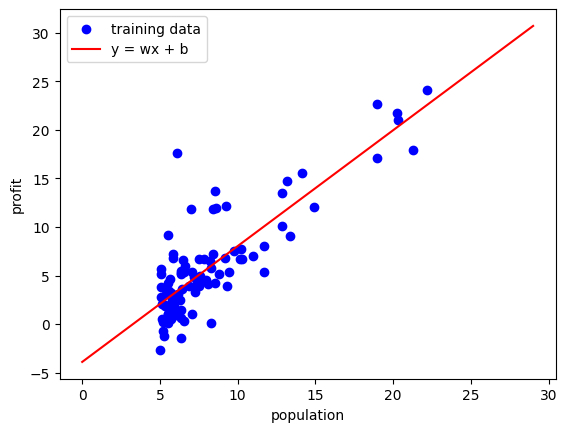

In [62]:
# 绘制拟合的曲线
fig, ax = plt.subplots()
ax.scatter(X[:,1], Y, label='training data', c='b')
newX = np.linspace(0, 29, 30)
newY = theta[0,0] + theta[1,0] * newX
ax.plot(newX, newY, color='r', label="y = wx + b")
ax.legend()  # 调用后才能生成标签
ax.set(xlabel="population", ylabel="profit")
plt.show()